In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from scipy import special
import pandas as pd

0.7479017022969713
[-0.82098055 -0.65392647 -0.61618614 -0.32850407 -0.13926207  0.
  0.0295588   0.10436002  0.11332869  0.12221763  0.14842001  0.16551444
  0.26236426  0.27002714  0.30010459  0.30010459  0.3074847   0.3074847
  0.3074847   0.32930375  0.36464311  0.37843644  0.41210965  0.52472853
  0.52472853  0.54232429  0.54232429  0.56531381  0.60976557  0.63127178
  0.68309684  0.69314718  0.73236789  0.75612198  0.77472717  0.81977983
  0.86710049  0.89199804  0.91629073  0.9282193   0.98954119  1.00795792
  1.03673688  1.03673688  1.07840958  1.09861229  1.29746315  1.51512723
  1.58923521  1.85159947  4.31748811]


(array([ 4.,  8., 20., 14.,  3.,  1.,  0.,  0.,  0.,  1.]),
 array([-0.82098055, -0.30713369,  0.20671318,  0.72056005,  1.23440691,
         1.74825378,  2.26210065,  2.77594751,  3.28979438,  3.80364125,
         4.31748811]),
 <BarContainer object of 10 artists>)

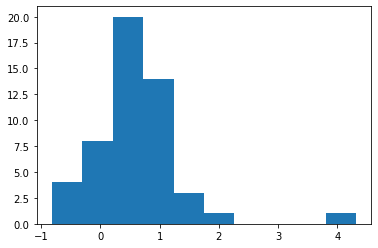

In [55]:
# Example 5.8 Bootstrap Confidence Intervals for a Complicated Sample Statisitc

# Analytical form does not need to be known
# Standard deviation of log(x) of 1933 -1982 Ithaca January precipitation A2
# s(ln(x)) = 0.537 with n=50
# know or estimate the true value of s^
# Picture of sample distrib of s^with n_bootstrap =10.000 with size =50 from log(x)
# confidence regions for s^(ln(x)) percentile method (Efron 1982,Efron and Gong, 1983)
# Form (1-alpha)% confid interval
# Find the values defining the smallest n_boots*alpha/2 of nb
# This values also define the central nb(1-alpha) of the estimates
# 0.41-0.65 of 95%
# 1-alpha = 95%
# 10000*5%/2= 250 & 9750

# January Precipitation at Ithaca, New York, 1933 - 1982, inches
data_series_jan = np.array([0.44,1.18,2.69,2.08,3.66,1.72,2.82,0.72,1.46,1.30,1.35,0.54,2.74,
                            1.13,2.50,1.72,2.27,2.82,1.98,2.44,2.53,2.00,1.12,2.13,1.36,4.90,
                            2.94,1,75,1.69,1.88,1.31,1.76,2.17,2.38,1.16,1.39,1.36,1.03,1.11,
                            1.35,1.44,1.84,1.69,3.00,1.36,6.37,4.55,0.52,0.87,1.51])

log_x = np.sort(np.log(data_series_jan))

s_log_x=np.std((log_x))

print(s_log_x)

print(np.sort(log_x))
plt.hist(log_x)

51
Mean of Bootstrap S 0.7191233995860585
2.55% percentile: 0.44117402566322933
97.5% percentile: 1.070435682340604


(array([6.31200e+03, 1.59294e+05, 1.89451e+05, 2.41079e+05, 1.80123e+05,
        1.50829e+05, 5.65750e+04, 1.40330e+04, 2.14500e+03, 1.59000e+02]),
 array([0.28773571, 0.40475609, 0.52177648, 0.63879686, 0.75581724,
        0.87283763, 0.98985801, 1.10687839, 1.22389878, 1.34091916,
        1.45793954]),
 <BarContainer object of 10 artists>)

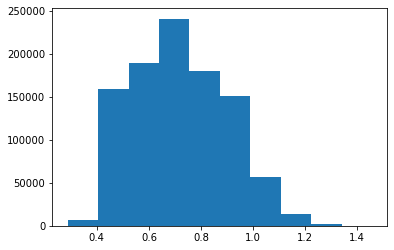

In [74]:
print(log_x.size)
#np.random.seed(2)
#bootstrap_std = np.array()
bootstrap_std=[]
for i in range(1000000):
    random_index = (np.random.choice(log_x.size,log_x.size))
    #print('random_index',random_index)
    #plt.hist(random_index)
    randomized_data = log_x[random_index]
    #randomized_data = random_index

    #print('randomized_data',randomized_data)
    bootstrap_std += [np.std(randomized_data)]
 
#print('bootstrap_std', bootstrap_std)

print('Mean of Bootstrap S',np.mean(bootstrap_std))
print('2.55% percentile:', np.percentile(bootstrap_std,2.5))
print('97.5% percentile:', np.percentile(bootstrap_std,97.5))
    
plt.hist(bootstrap_std)


In [92]:
# Aufgabe 5.8 - Bootstrap

# Discuss how the sampling distribution of the skewness coefficient of June precipitation at Guayqquil could be estimated
# by suing data in Table A3, buy bootstrapping. How could the resulting bootstrap distribution be used to estimate
# a 95% conficence interval for this statistic?

# January Precipitation at Ithaca, New York, 1933 - 1982, inches
data_series_june = np.array([43,10,4,0,2,31,0,0,0,2,3,0,4,15,2,0,1,127,2])

x = np.sort((data_series_june))



print(x)

print(x.size)


gamma_sk = 1/(x.size-1)*np.sum((x-np.mean(x))**3)/np.std(x)**3

print('Skewness factor gamma:',gamma_sk)


[  0   0   0   0   0   0   1   2   2   2   2   3   4   4  10  15  31  43
 127]
19
Skewness factor gamma: 3.353808925483492


Mean of Bootstrap Skew 2.6543662390055234
2.55% percentile: 1.174339412834621
97.5% percentile: 4.1075250859576204


(array([2.00000e+01, 4.56000e+02, 2.41800e+03, 1.88170e+04, 8.67820e+04,
        1.76826e+05, 2.66981e+05, 1.61070e+05, 1.77712e+05, 1.08918e+05]),
 array([-0.92193152, -0.40713575,  0.10766001,  0.62245577,  1.13725154,
         1.6520473 ,  2.16684307,  2.68163883,  3.19643459,  3.71123036,
         4.22602612]),
 <BarContainer object of 10 artists>)

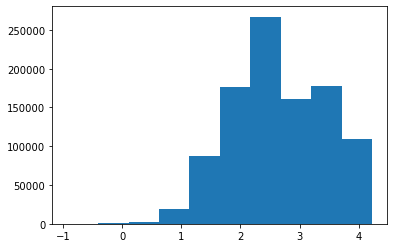

In [95]:
def gamma_skew(y):

    gamma_skew = 1/(y.size-1)*np.sum((y-np.mean(y))**3)/np.std(y)**3

    return gamma_skew




#np.random.seed(2)
#bootstrap_std = np.array()
bootstrap_skw=[]
for i in range(1000000):
    random_index = (np.random.choice(x.size,x.size))
    #print('random_index',random_index)
    #plt.hist(random_index)
    randomized_data = x[random_index]
    #randomized_data = random_index

    #print('randomized_data',randomized_data)
    bootstrap_skw += [gamma_skew(randomized_data)]
 
#print('bootstrap_std', bootstrap_std)

print('Mean of Bootstrap Skew',np.mean(bootstrap_skw))
print('2.55% percentile:', np.percentile(bootstrap_skw,2.5))
print('97.5% percentile:', np.percentile(bootstrap_skw,97.5))
    
plt.hist(bootstrap_skw)

In [ ]:
#https://datasciencechalktalk.com/2019/11/12/bootstrap-sampling-an-implementation-with-python/